# Assignment: Trees
Do three questions.

In [128]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models. 

3. Why is the Gini a good loss function for categorical target variables? 

4. Why do trees tend to overfit, and how can this tendency be constrained? 

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

In [129]:
df = pd.read_csv("./data/cars_hw.csv")

print(f'{df.shape[0]} Observations\n{df.shape[1]} Features/Co-variates/Variables\n')

print("Available Variables:")
for col in df.columns:
    print(col)

print()

df.head()

976 Observations
12 Features/Co-variates/Variables

Available Variables:
Unnamed: 0
Make
Make_Year
Color
Body_Type
Mileage_Run
No_of_Owners
Seating_Capacity
Fuel_Type
Transmission
Transmission_Type
Price



,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

In [130]:
from sklearn.model_selection import train_test_split

dummy_cols = ["Make", "Color", "Body_Type", "No_of_Owners", "Fuel_Type", "Transmission", "Transmission_Type"]
dummies = pd.get_dummies(df.loc[:, dummy_cols], dtype = "int")

num_cols = ["Mileage_Run", "Make_Year", "Seating_Capacity"]
nums = df.loc[:, num_cols]

X = pd.concat([nums, dummies], axis = 1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

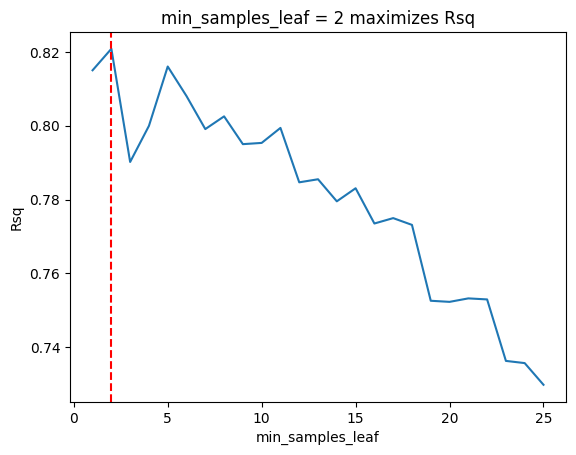

In [131]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

min_samples_leaf = np.arange(1, 26, 1)
r2_vals = []

for min in min_samples_leaf:
    cart = DecisionTreeRegressor(min_samples_leaf = min, random_state = 42).fit(X_train, y_train)
    
    y_hat = cart.predict(X_test)
    res = y_test - y_hat

    rsq = 1 - np.sum(res ** 2) / np.sum((y_test - np.mean(y_train)) ** 2)
    r2_vals.append(rsq)


maximizer = np.where(max(r2_vals) == r2_vals)
best_rsq = min_samples_leaf[maximizer]


plt.figure()
plt.plot(min_samples_leaf, r2_vals)
plt.xlabel("min_samples_leaf")
plt.ylabel("Rsq")
plt.axvline(x = best_rsq, linestyle = "--", color = 'r')
plt.title(f"min_samples_leaf = {best_rsq[0]} maximizes Rsq")
plt.show()


4. For the optimal min_samples_leaf from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

In [132]:
cart = DecisionTreeRegressor(min_samples_leaf = best_rsq[0], random_state = 42).fit(X_train, y_train)

y_hat = cart.predict(X_test)
res = y_test - y_hat
rsq = 1 - np.sum(res ** 2) / np.sum((y_test - np.mean(y_train)) ** 2)
rmse = np.sqrt(np.mean(res ** 2))

print(f"Rsq: {round(rsq, 4)}\nRMSE: {round(rmse, 4)}")

var_names = cart.feature_names_in_

Rsq: 0.8208
RMSE: 144166.7019


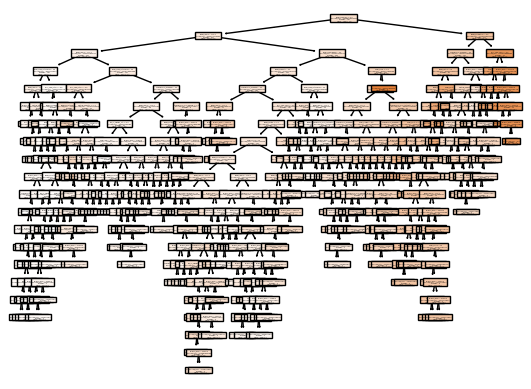

In [133]:
plt.figure()
plot_tree(cart, filled = True, feature_names = var_names)
plt.show()

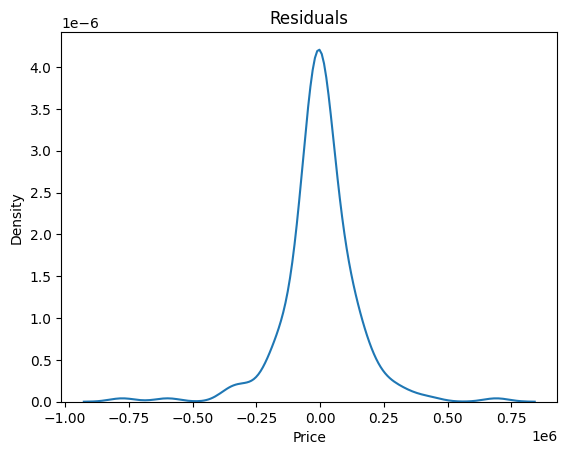

In [134]:
plt.figure()
sns.kdeplot(res)
plt.title("Residuals")
plt.show()

5. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

In [135]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
y_hat = reg.predict(X_test)
res = y_test - y_hat
rsq = 1 - np.sum(res ** 2) / np.sum((y_test - np.mean(y_train)) ** 2)
rmse = np.sqrt(np.mean(res ** 2))
print(f"Rsq: {round((rsq), 4)}\nRMSE: {round(rmse, 4)}")

Rsq: 0.8223
RMSE: 143575.1966


**The linear regression performs slightly better on the test set, as seen by the slightly higher $R^2$, and slightly lower root mean square error**

6. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

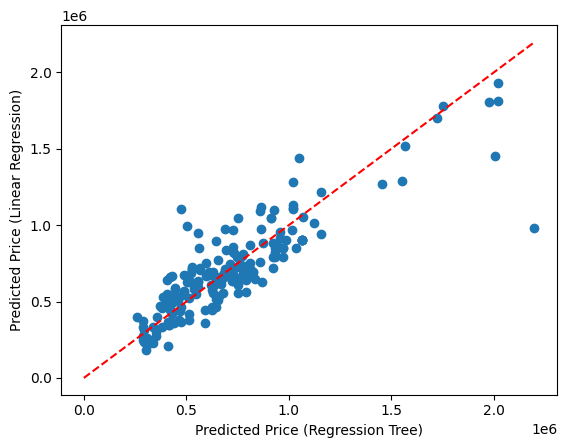

In [136]:
tree_predictions = cart.predict(X_test)
linreg_predictions = reg.predict(X_test)
x = np.linspace(0, 2200000, 1000)
y = x
plt.figure()
plt.scatter(tree_predictions, linreg_predictions)
plt.plot(x, y, linestyle = '--', color = 'r')
plt.xlabel("Predicted Price (Regression Tree)")
plt.ylabel("Predicted Price (Linear Regression)")
plt.show()

**At lower prices, the two predictions are fairly similar, with some larger predictions from the linear regression. At higher prices, the regression tree is making much larger predictions than the linear regression**

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

In [137]:
df = pd.read_csv("./data/Breast Cancer METABRIC.csv")

print(f'{df.shape[0]} Observations\n{df.shape[1]} Variables\n')

print("First 5 Variables:")
for col in df.columns[:5]:
    print(col)

print()

df.head(2)

2509 Observations
34 Variables

First 5 Variables:
Patient ID
Age at Diagnosis
Type of Breast Surgery
Cancer Type
Cancer Type Detailed



,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living


2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

In [138]:
nums = df.loc[:, ["Tumor Size", "Lymph nodes examined positive", "Age at Diagnosis"]]
dummies = pd.get_dummies(data = df.loc[:, ["Tumor Stage", "Chemotherapy", "Cancer Type Detailed"]], dtype = 'int')
X = pd.concat([nums, dummies], axis = 1)
X.head(1)

,Tumor Size,Lymph nodes examined positive,Age at Diagnosis,Tumor Stage,Chemotherapy_No,Chemotherapy_Yes,Cancer Type Detailed_Breast,Cancer Type Detailed_Breast Angiosarcoma,Cancer Type Detailed_Breast Invasive Ductal Carcinoma,Cancer Type Detailed_Breast Invasive Lobular Carcinoma,Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma,Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma,Cancer Type Detailed_Invasive Breast Carcinoma,Cancer Type Detailed_Metaplastic Breast Cancer
0,22.0,10.0,75.65,2.0,1,0,0,0,1,0,0,0,0,0


3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

In [139]:
from sklearn.tree import DecisionTreeClassifier

y = df.loc[:, ["Overall Survival Status"]]
temp = pd.concat([X, y], axis = 1)
temp = temp.dropna(subset = ["Overall Survival Status"])

X = temp.drop(columns = ["Overall Survival Status"])
y = temp.loc[:, ["Overall Survival Status"]]
y = y["Overall Survival Status"].map({"Living": 1, "Deceased": 0})

cart = DecisionTreeClassifier(min_samples_leaf = 10).fit(X, y)

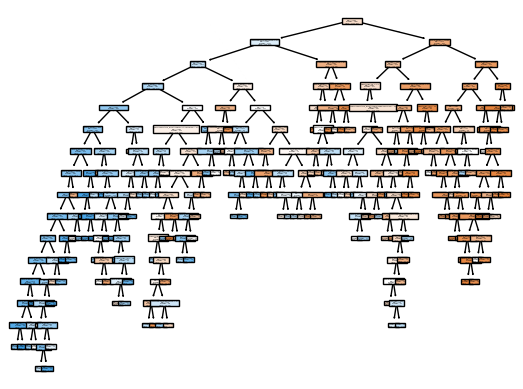

In [140]:
var_names = cart.feature_names_in_

plt.figure()
plot_tree(cart, filled = True, feature_names = var_names)
plt.show()

In [141]:
y_hat = cart.predict(X)
tab = pd.crosstab(y, y_hat, rownames = ["Actual"], colnames = ["Predicted"])
acc = (tab.iloc[0, 0] + tab.iloc[1, 1]) / len(y)

print("Accuracy: ", acc, "\n")
pd.crosstab(y, y_hat, rownames = ["Actual"], colnames = ["Predicted"])

Accuracy:  0.7576981322564361 



Predicted,0,1
Actual,,
0,949,195
1,285,552


4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

In [142]:
TPR = tab.iloc[1, 1] / (tab.iloc[1, 1] + tab.iloc[1, 0])
print("True Positive Rate: ", TPR)

TNR = tab.iloc[0, 0] / (tab.iloc[0, 0] + tab.iloc[0, 1])
print("True Negative Rate: ", TNR)

True Positive Rate:  0.6594982078853047
True Negative Rate:  0.8295454545454546


**The model performs better for true negative rate than true positive rate**

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

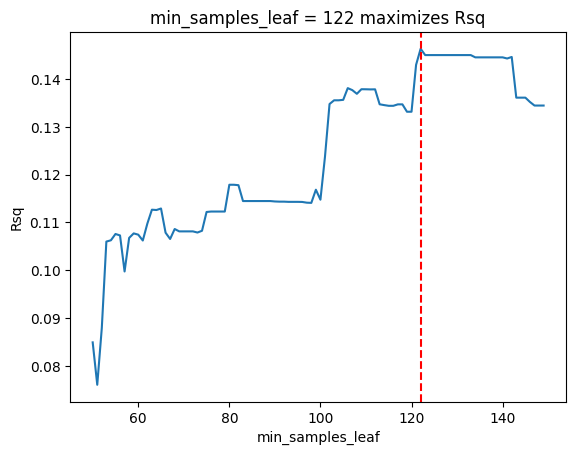

In [143]:
df = df.dropna(subset = ["Overall Survival (Months)"])
nums = df.loc[:, ["Tumor Size", "Lymph nodes examined positive", "Age at Diagnosis"]]
dummies = pd.get_dummies(data = df.loc[:, ["Tumor Stage", "Chemotherapy", "Cancer Type Detailed"]], dtype = 'int')
X = pd.concat([nums, dummies], axis = 1)
y = df["Overall Survival (Months)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
min_samples_leaf = np.arange(50, 150, 1)
r2_vals = []

for min in min_samples_leaf:
    cart = DecisionTreeRegressor(min_samples_leaf = min, random_state = 42).fit(X_train, y_train)
    
    y_hat = cart.predict(X_test)
    res = y_test - y_hat

    rsq = 1 - np.sum(res ** 2) / np.sum((y_test - np.mean(y_train)) ** 2)
    r2_vals.append(rsq)


maximizer = np.where(max(r2_vals) == r2_vals)
best_rsq = min_samples_leaf[maximizer][0]


plt.figure()
plt.plot(min_samples_leaf, r2_vals)
plt.xlabel("min_samples_leaf")
plt.ylabel("Rsq")
plt.axvline(x = best_rsq, linestyle = "--", color = 'r')
plt.title(f"min_samples_leaf = {best_rsq} maximizes Rsq")
plt.show()


In [144]:
cart = DecisionTreeRegressor(min_samples_leaf = best_rsq, random_state = 42).fit(X_train, y_train)
y_hat = cart.predict(X_test)
res = y_test - y_hat
rsq = 1 - np.sum(res ** 2) / np.sum((y_test - np.mean(y_train)) ** 2)
rmse = np.sqrt(np.mean(res ** 2))

print(f"Rsq: {round(rsq, 4)}\nRMSE: {round(rmse, 4)}")

Rsq: 0.1463
RMSE: 70.2922


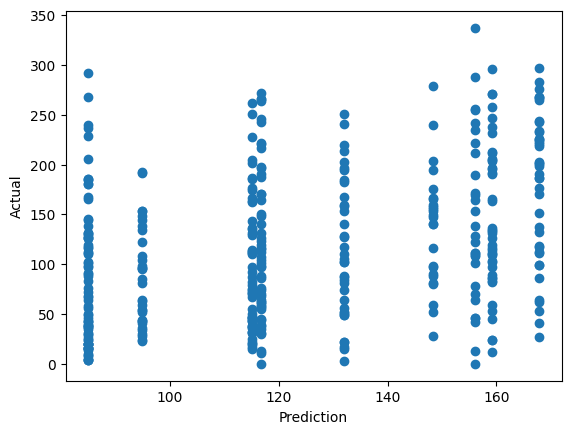

In [145]:
plt.figure()
plt.scatter(y_hat, y_test)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

**For clinical purposes, I do not think this model is accurate enough to be useful**

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

In [146]:
df = pd.read_csv("./data/corporate_ratings.csv")

print(f'{df.shape[0]} Observations\n{df.shape[1]} Variables\n')

print("First 5 Variables:")
for col in df.columns[:5]:
    print(col)

print()

df.head(2)

2029 Observations
31 Variables

First 5 Variables:
Rating
Name
Symbol
Rating Agency Name
Date



,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.09969,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.20312,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846


2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

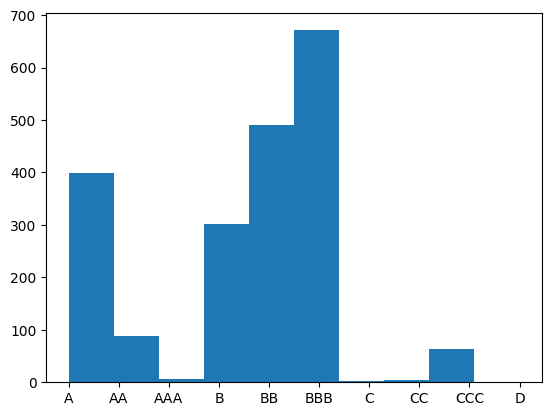

In [147]:
plt.figure()
plt.hist(df.sort_values(by = 'Rating', ascending = True)["Rating"])
plt.show()

In [151]:
df["Rating"].value_counts()

Rating
B      1463
A       494
CCC      64
CC        5
C         2
D         1
Name: count, dtype: int64

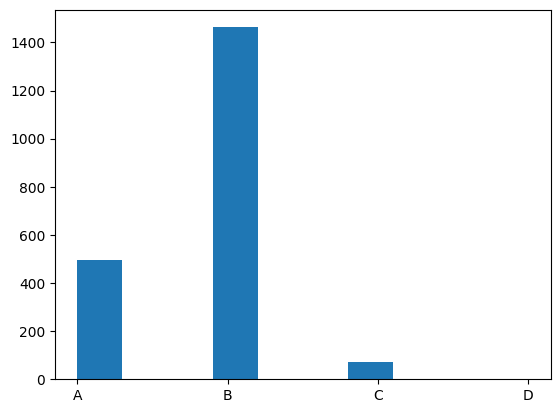

In [153]:
# Suppose your column is named 'Credit Rating'
df["Rating"] = df["Rating"].replace({
    "AAA": "A", "AA": "A", "A": "A",
    "BBB": "B", "BB": "B", "B": "B",
    "CCC": "C", "CC": "C", "C": "C",
    "DDD": "D", "DD": "D", "D": "D"
})

plt.figure()
plt.hist(df.sort_values(by = 'Rating', ascending = True)["Rating"])
plt.show()

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

In [167]:
numerics = df.iloc[:, 6:]
dummies = pd.get_dummies(df.iloc[:, 5], dtype = 'int')
X = pd.concat([dummies, numerics], axis = 1)
y = df["Rating"].map({'A': 0, 'B' : 1, 'C' : 2, 'D' : 3})

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

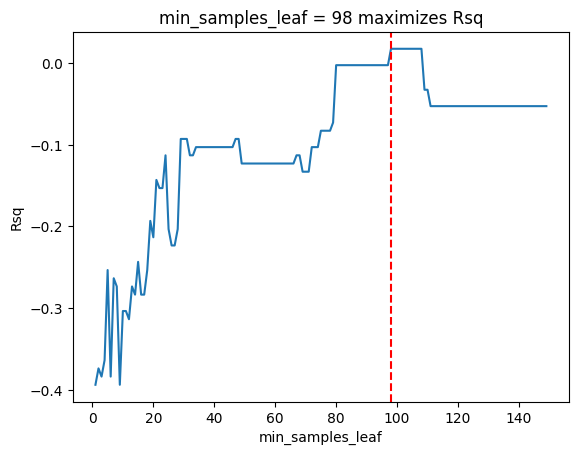

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
min_samples_leaf = np.arange(1, 150, 1)
r2_vals = []

for min in min_samples_leaf:
    cart = DecisionTreeClassifier(min_samples_leaf = min, random_state = 42).fit(X_train, y_train)
    
    y_hat = cart.predict(X_test)
    res = y_test - y_hat

    rsq = 1 - np.sum(res ** 2) / np.sum((y_test - np.mean(y_train)) ** 2)
    r2_vals.append(rsq)


maximizer = np.where(max(r2_vals) == r2_vals)
best_rsq = min_samples_leaf[maximizer][0]


plt.figure()
plt.plot(min_samples_leaf, r2_vals)
plt.xlabel("min_samples_leaf")
plt.ylabel("Rsq")
plt.axvline(x = best_rsq, linestyle = "--", color = 'r')
plt.title(f"min_samples_leaf = {best_rsq} maximizes Rsq")
plt.show()

In [ ]:
cart = DecisionTreeClassifier

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. 

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?